# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [8]:
sets = [cities[x:x+50] for x in range(0,len(cities),50)]

lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_two = []

# add url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# define query
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# loops for dataframe columns
print(f"Beginning Data Retrieval")
for i in range(len(sets)):
    print(f"---------------------")
    time.sleep(60)
    for x in range(len(sets[i])):
        response = requests.get(query_url + sets[i][x]).json()
        try:
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            cities_two.append(sets[i][x])
            print(f"Processing Record {x+1} of Set {i+1} | {sets[i][x]}")
        except: 
            print(f"City not found. Skipping...")
        
print(f"Data Retrieval Complete")


Beginning Data Retrieval
---------------------
City not found. Skipping...
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | rikitea
City not found. Skipping...
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | dandong
Processing Record 9 of Set 1 | padang
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | dali
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | benjamin aceval
Processing Record 16 of Set 1 | angoram
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | preobrazheniye
Processing Record 21 of Set 1 | necochea
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | saint-georges
Processing Record 24 of

Processing Record 1 of Set 5 | hami
Processing Record 2 of Set 5 | malakal
Processing Record 3 of Set 5 | beringovskiy
Processing Record 4 of Set 5 | ponta do sol
Processing Record 5 of Set 5 | salalah
Processing Record 6 of Set 5 | meulaboh
Processing Record 7 of Set 5 | ayan
Processing Record 8 of Set 5 | mae hong son
Processing Record 9 of Set 5 | savannah bight
Processing Record 10 of Set 5 | mecca
Processing Record 11 of Set 5 | namibe
Processing Record 12 of Set 5 | gat
Processing Record 13 of Set 5 | vega de alatorre
Processing Record 14 of Set 5 | nacala
Processing Record 15 of Set 5 | faya
Processing Record 16 of Set 5 | joshimath
Processing Record 17 of Set 5 | san rafael del sur
Processing Record 18 of Set 5 | vanimo
Processing Record 19 of Set 5 | broken hill
City not found. Skipping...
Processing Record 21 of Set 5 | muli
Processing Record 22 of Set 5 | rio grande
Processing Record 23 of Set 5 | pando
Processing Record 24 of Set 5 | pyinmana
Processing Record 25 of Set 5 |

Processing Record 5 of Set 9 | coihaique
Processing Record 6 of Set 9 | nemuro
Processing Record 7 of Set 9 | raudeberg
Processing Record 8 of Set 9 | paredon
Processing Record 9 of Set 9 | abhaynagar
Processing Record 10 of Set 9 | belmonte
Processing Record 11 of Set 9 | cidreira
Processing Record 12 of Set 9 | qaqortoq
Processing Record 13 of Set 9 | starogard gdanski
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 9 | mogadishu
Processing Record 17 of Set 9 | chimbote
Processing Record 18 of Set 9 | sao borja
City not found. Skipping...
Processing Record 20 of Set 9 | hyeres
Processing Record 21 of Set 9 | watertown
Processing Record 22 of Set 9 | evensk
Processing Record 23 of Set 9 | ornskoldsvik
Processing Record 24 of Set 9 | monte patria
Processing Record 25 of Set 9 | hay river
Processing Record 26 of Set 9 | korla
Processing Record 27 of Set 9 | tabuk
Processing Record 28 of Set 9 | villa carlos paz
Processing Record 29 of Set 9 | roald
Pr

Processing Record 4 of Set 13 | poronaysk
Processing Record 5 of Set 13 | sal rei
Processing Record 6 of Set 13 | canto do buriti
Processing Record 7 of Set 13 | biltine
Processing Record 8 of Set 13 | sorong
Processing Record 9 of Set 13 | vilyuysk
Processing Record 10 of Set 13 | nyirpazony
Processing Record 11 of Set 13 | kansanshi
Processing Record 12 of Set 13 | khandyga
Processing Record 13 of Set 13 | zhigansk
Processing Record 14 of Set 13 | crnici
Processing Record 15 of Set 13 | foumban
City not found. Skipping...
Processing Record 17 of Set 13 | karaton
Processing Record 18 of Set 13 | muswellbrook
Processing Record 19 of Set 13 | juneau
Processing Record 20 of Set 13 | marsh harbour
Processing Record 21 of Set 13 | te anau
Processing Record 22 of Set 13 | tautira
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data_df = pd.DataFrame({"City": cities_two,
                            "Lat" : lat,
                            "Lng" : lng,
                            "Max Temp" : max_temp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : wind_speed,
                            "Country" : country,
                            "Date" : date})
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bathsheba,13.2167,-59.5167,77.61,83,75,13.80,BB,1644191736
1,lompoc,34.6391,-120.4579,77.09,52,0,11.50,US,1644191737
2,yellowknife,62.4560,-114.3525,-1.68,84,75,3.44,CA,1644191517
3,rikitea,-23.1203,-134.9692,79.32,71,3,18.54,PF,1644191718
4,castro,-24.7911,-50.0119,65.37,83,47,1.86,BR,1644191737


In [10]:
city_data_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
humidity_test = city_data_df.describe()
humidity_test

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,18.78503,20.518743,49.526714,74.140598,55.975395,7.629473,1.644192e+09
std,33.15962,90.978574,31.846009,20.194161,39.134466,6.188797,2.821543e+02
min,-54.80000,-175.200000,-41.220000,10.000000,0.000000,0.000000,1.644191e+09
25%,-8.25780,-61.193600,30.020000,65.000000,16.000000,3.110000,1.644192e+09
50%,20.90000,24.662200,61.360000,78.000000,64.000000,5.880000,1.644192e+09
75%,46.04180,101.766700,75.040000,90.000000,98.000000,10.470000,1.644192e+09
max,78.21860,179.316700,89.380000,100.000000,100.000000,49.260000,1.644193e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
# no cities have humidity over 100%, max is 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

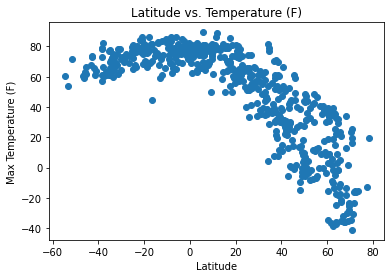

In [15]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs. Temperature (F)')
plt.savefig('LatTemp')
plt.show()


In [ ]:
# This code is analyzing the temperature at each latitude. 
# This graph tells us that the Max Temperature is much higher at lower latitudes (negative latitude).
# This makes sense because it is currently summer in the Southern Hemisphere and winter in the Northern Hemisphere.
# As you go further north of the equator (greater than 0 latitude), the max temperature plummets. 

## Latitude vs. Humidity Plot

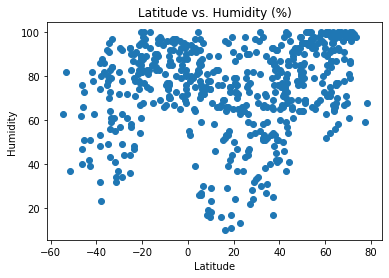

In [16]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity (%)')
plt.savefig('LatHumidity')
plt.show()


In [ ]:
# This code analyzes the level of humidity at each latitude. 
# Based on this data, there is a wide variety of humidity levels at each latitude.
# The major observable trend from this plot is there are higher levels of humidity from 0 to -20 and 40 to 60. 

## Latitude vs. Cloudiness Plot

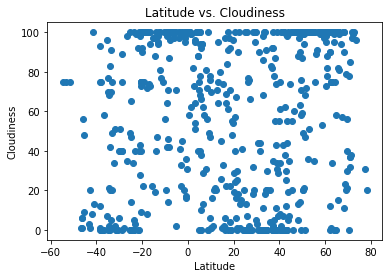

In [17]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.savefig('LatCloudiness')
plt.show()


In [ ]:
# This code analyzes the cloudiness at each latitude. 
# The graph shows us that cloudiness is not highly dependent on the latitude, as the plot is scattered and not
# highly concentrated in any area. 

## Latitude vs. Wind Speed Plot

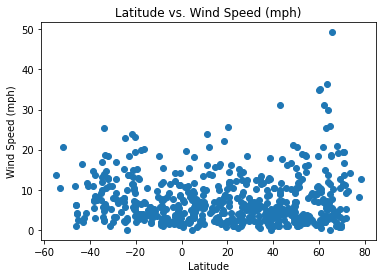

In [18]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph)')
plt.savefig('LatWindSpeed')
plt.show()


In [ ]:
# # This code analyzes the wind speed at each latitude. 
# The graph shows us that wind speed is not highly dependent on the latitude, as the plot is scattered and not
# highly concentrated based on latitude. There are a few outliers, but most have wind speeds less than 20 mph regardless
# of latitude. 

## Linear Regression

The r-value is: 0.6077698783491519


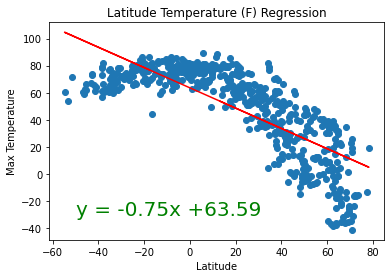

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'],city_data_df['Max Temp'])
regress_values1 = city_data_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.plot(city_data_df['Lat'], regress_values1, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-50,-30),fontsize=20,color="green")
print(f'The r-value is: {rvalue**2}')
plt.title('Latitude Temperature (F) Regression')
plt.show()

In [ ]:
# This regression is predicting the max temperature (y) based on the latitude (x) based on the data for the cities 
# pulled from the weather API. Max temperature is highest around the equator (0 on the latitude axis). It is also 
# high in the southern hemisphere (Latitudes in the negative) and the regression allows us to predict what the max
# temperature will be based on the latitude. 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
city_data_nh = city_data_df.loc[city_data_df['Lat']>0]
city_data_sh = city_data_df.loc[city_data_df['Lat']<0]

The r-value is: 0.722214108751922


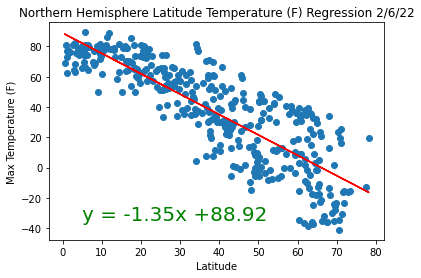

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_nh['Lat'],city_data_nh['Max Temp'])
regress_values1 = city_data_nh['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(city_data_nh['Lat'], city_data_nh['Max Temp'])
plt.plot(city_data_nh['Lat'], regress_values1, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(5,-35),fontsize=20,color="green")
print(f'The r-value is: {rvalue**2}')
plt.title('Northern Hemisphere Latitude Temperature (F) Regression 2/6/22')
plt.show()

In [ ]:
# This linear regression gives us a look at max temperature for cities in the northern hemisphere. 
# Given that it is currently winter in the northern hemisphere, the max temperature decreases the higher the 
# level of latitude (further from the equator).

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.27097635692642313


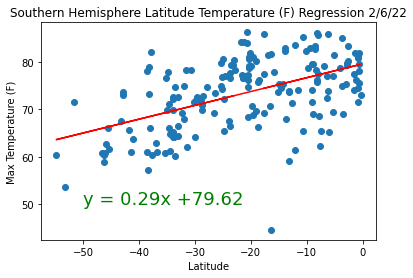

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_sh['Lat'],city_data_sh['Max Temp'])
regress_values1 = city_data_sh['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(city_data_sh['Lat'], city_data_sh['Max Temp'])
plt.plot(city_data_sh['Lat'], regress_values1, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-50, 50),fontsize=18,color="green")
print(f'The r-value is: {rvalue**2}')
plt.title('Southern Hemisphere Latitude Temperature (F) Regression 2/6/22')
plt.show()

In [ ]:
# This linear regression gives us a look at max temperature for cities in the southern hemisphere. 
# The temperature in the southern hemisphere is much higher than the northern overall, but still gets warmer closer
# to the equator (latitude of 0).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1409660393805839


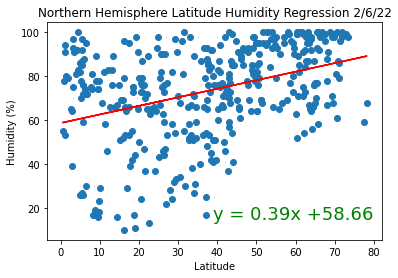

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_nh['Lat'],city_data_nh['Humidity'])
regress_values1 = city_data_nh['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(city_data_nh['Lat'], city_data_nh['Humidity'])
plt.plot(city_data_nh['Lat'], regress_values1, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(39,15),fontsize=18,color="green")
print(f'The r-value is: {rvalue**2}')
plt.title('Northern Hemisphere Latitude Humidity Regression 2/6/22')
plt.show()

In [ ]:
# Based on this regression, the humidity increases at higher latitudes, as evidenced by the positive slope of the line. 
# It is not a large increase, but based on the data pulled, it is reasonable to expect a higher level of humidity at 
# higher latitudes. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2077399206140659


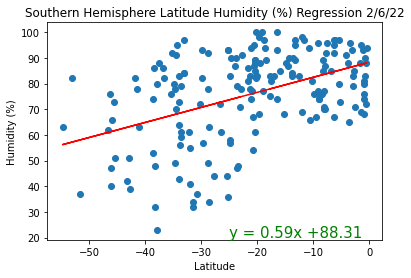

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_sh['Lat'],city_data_sh['Humidity'])
regress_values1 = city_data_sh['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(city_data_sh['Lat'], city_data_sh['Humidity'])
plt.plot(city_data_sh['Lat'], regress_values1, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25, 20),fontsize=15,color="green")
print(f'The r-value is: {rvalue**2}')
plt.title('Southern Hemisphere Latitude Humidity (%) Regression 2/6/22')
plt.show()

In [ ]:
## Based on this regression, the humidity increases at higher latitudes, as evidenced by the positive slope of the line. 
# It is not a large increase, but based on the data pulled, it is reasonable to expect a higher level of humidity at 
# higher latitudes (Closer to the equator for the Southern hemisphere)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04722168499728287


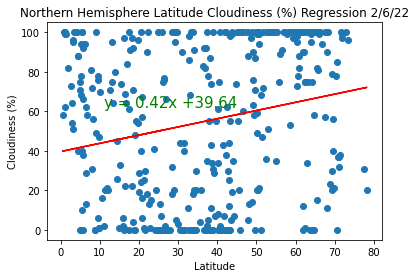

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_nh['Lat'],city_data_nh['Cloudiness'])
regress_values1 = city_data_nh['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(city_data_nh['Lat'], city_data_nh['Cloudiness'])
plt.plot(city_data_nh['Lat'], regress_values1, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(11, 62),fontsize=15,color="green")
print(f'The r-value is: {rvalue**2}')
plt.title('Northern Hemisphere Latitude Cloudiness (%) Regression 2/6/22')
plt.show()

In [ ]:
# There is not a strong relationship between latitude and cloudiness, but based on this regression higher latitudes
# can expect higher levels of cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1974982411361325


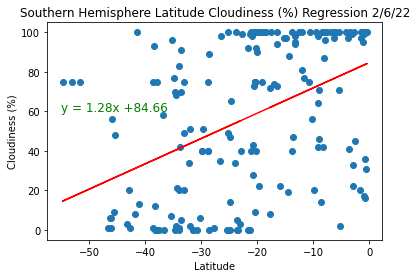

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_sh['Lat'],city_data_sh['Cloudiness'])
regress_values1 = city_data_sh['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(city_data_sh['Lat'], city_data_sh['Cloudiness'])
plt.plot(city_data_sh['Lat'], regress_values1, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-55, 60),fontsize=12,color="green")
print(f'The r-value is: {rvalue**2}')
plt.title('Southern Hemisphere Latitude Cloudiness (%) Regression 2/6/22')
plt.show()

In [ ]:
# Higher latitudes (closer to the equator) will likely higher levels of cloudiness based on this regression. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.023362713066260282


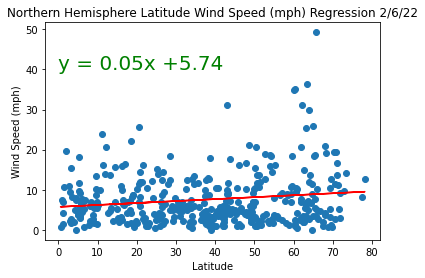

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_nh['Lat'],city_data_nh['Wind Speed'])
regress_values1 = city_data_nh['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(city_data_nh['Lat'], city_data_nh['Wind Speed'])
plt.plot(city_data_nh['Lat'], regress_values1, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(0, 40),fontsize=20,color="green")
print(f'The r-value is: {rvalue**2}')
plt.title('Northern Hemisphere Latitude Wind Speed (mph) Regression 2/6/22')
plt.show()

In [ ]:
# There is almost no impact on wind speed at different latitudes, as evidenced by the near-zero slope of the regression line.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.052561307724585025


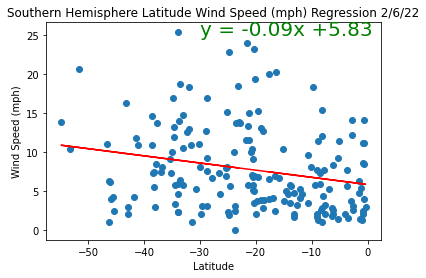

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_sh['Lat'],city_data_sh['Wind Speed'])
regress_values1 = city_data_sh['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(city_data_sh['Lat'], city_data_sh['Wind Speed'])
plt.plot(city_data_sh['Lat'], regress_values1, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-30, 25),fontsize=20,color="green")
print(f'The r-value is: {rvalue**2}')
plt.title('Southern Hemisphere Latitude Wind Speed (mph) Regression 2/6/22')
plt.show()

In [ ]:
# There is almost no impact on wind speed at different latitudes, as evidenced by the near-zero slope of the regression line.
# The southern hemisphere shows a slightly lower wind speed closer to the equator (latitude 0), but it is still a very small
# correlation between latitude and wind speed. 